In [50]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.datasets.samples_generator import make_blobs, make_moons
from sklearn.cluster import KMeans

In [51]:
#1
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, optional (default=100)
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=None)
        The number of centers to generate, or the fixed center locations.
        If n_samples is an int and centers is None, 3 centers are generated.
        If n_samples is array-like, centers

In [52]:
#2
X, y = make_blobs(n_samples=120, centers=4, n_features=2, cluster_std=0.4)

In [53]:
#3
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (120, 2)
y shape: (120,)


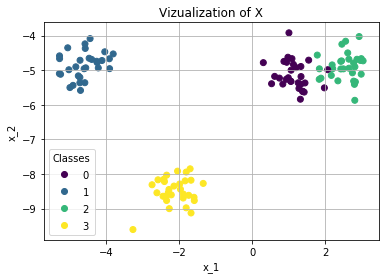

In [54]:
#4
scatter_plt = plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Vizualization of X")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(*scatter_plt.legend_elements(),  title="Classes")

In [55]:
#5
k_means = KMeans(init='random', n_clusters=4)

In [56]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [57]:
y_pred = k_means.predict(X)

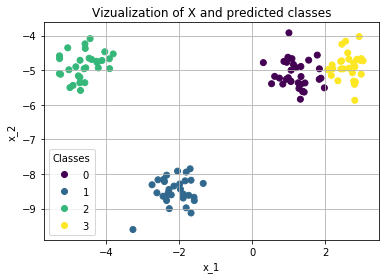

In [58]:
#6
scatter_plt_pred = plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Vizualization of X and predicted classes")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(*scatter_plt_pred.legend_elements(),  title="Classes")

Text(0, 0.5, 'x_2')

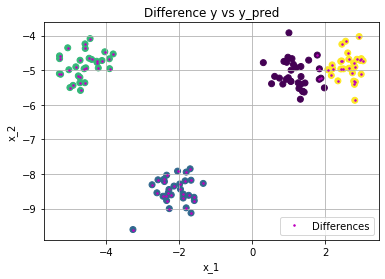

In [59]:
scatter_plt_pred = plt.scatter(X[:,0], X[:,1], c=y_pred)

different = (y == 5)

for k in np.unique(y):
    different += ((y == k) != (y_pred == k))

identic = np.logical_not(different)
plt.plot(X[different, 0], X[different, 1],
        color='m', marker='.', linewidth=0, markersize =3)
plt.title('Difference y vs y_pred')
plt.legend (['Differences'])

plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")

In [60]:
#7
k_means.inertia_

34.77462943575535

In [61]:
def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di


In [62]:
clusters = [X[k_means.labels_== i] for i in np.unique(y_pred)]

In [63]:
dunn(clusters)

0.09788315611878574

In [64]:
#1
X, y = make_blobs(n_samples=200, centers=5, n_features=2, cluster_std=0.8)

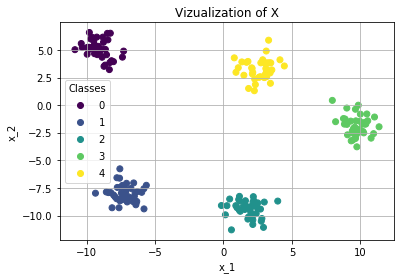

In [65]:
scatter_plt = plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Vizualization of X")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(*scatter_plt.legend_elements(),  title="Classes")

In [66]:
#2
k_means_5 = KMeans(init='random', n_clusters=5)

In [67]:
k_means_5.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [68]:
y_pred = k_means_5.predict(X)

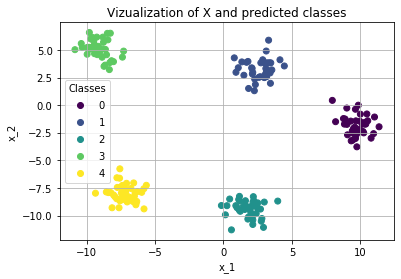

In [69]:
scatter_plt_pred = plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Vizualization of X and predicted classes")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(*scatter_plt_pred.legend_elements(),  title="Classes")

Text(0, 0.5, 'x_2')

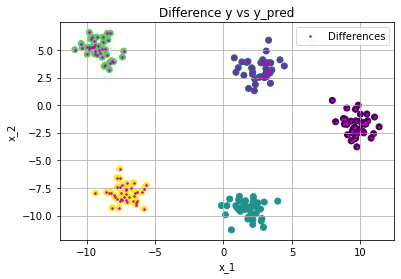

In [70]:
scatter_plt_pred = plt.scatter(X[:,0], X[:,1], c=y_pred)

different = (y == 5)
for k in np.unique(y):
    different += ((y == k) != (y_pred == k))

identic = np.logical_not(different)
plt.plot(X[different, 0], X[different, 1],
        color='m', marker='.', linewidth=0, markersize =3)
plt.title('Difference y vs y_pred')
plt.legend (['Differences'])
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")

In [71]:
#3
k_means_2 = KMeans(init='random', n_clusters=2)

In [72]:
k_means_2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [73]:
y_pred = k_means_2.predict(X)

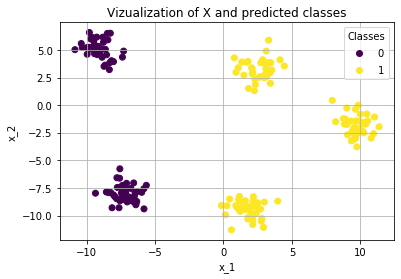

In [74]:
scatter_plt_pred = plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Vizualization of X and predicted classes")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(*scatter_plt_pred.legend_elements(),  title="Classes")

In [75]:
#4
k_means_5.inertia_

262.94081688213697

In [76]:
k_means_2.inertia_

8518.820676106618

In [77]:
dunn([X[k_means_5.labels_== i] for i in range(5)])

0.9989594540348855

In [78]:
dunn([X[k_means_2.labels_== i] for i in range(2)])

0.32547619021970203

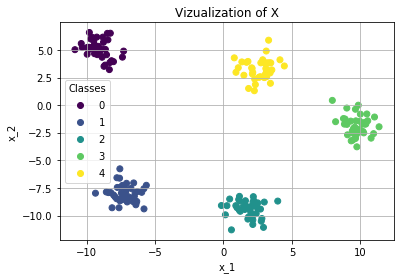

In [79]:
#K-means ++
scatter_plt = plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Vizualization of X")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(*scatter_plt.legend_elements(),  title="Classes")

In [80]:
#1
k_means_5_plusplus = KMeans(init ='k-means++', n_clusters=5)

In [81]:
k_means_5_plusplus.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [82]:
y_pred = k_means_5_plusplus.predict(X)

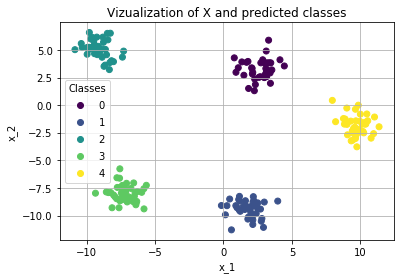

In [83]:
scatter_plt_pred = plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Vizualization of X and predicted classes")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(*scatter_plt_pred.legend_elements(),  title="Classes")

Text(0, 0.5, 'x_2')

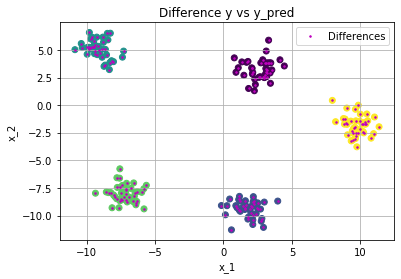

In [84]:
scatter_plt_pred = plt.scatter(X[:,0], X[:,1], c=y_pred)

different = (y == 5)
for k in np.unique(y):
    different += ((y == k) != (y_pred == k))

identic = np.logical_not(different)
plt.plot(X[different, 0], X[different, 1],
        color='m', marker='.', linewidth=0, markersize =3)
plt.title('Difference y vs y_pred')
plt.legend (['Differences'])

plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")

In [85]:
#2
k_means_5.inertia_

262.94081688213697

In [86]:
k_means_5_plusplus.inertia_

262.94081688213697

In [87]:
dunn([X[k_means_5.labels_== i] for i in range(5)])

0.9989594540348855

In [88]:
dunn([X[k_means_5_plusplus.labels_== i] for i in range(5)])

0.9989594540348855

In [89]:
#elbow method
#1
X, y = make_blobs(n_samples=120, centers=5, n_features=2, cluster_std=.4)

In [90]:
inertias = []
for k in range(2, 9):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    inertias.append(k_means.inertia_)

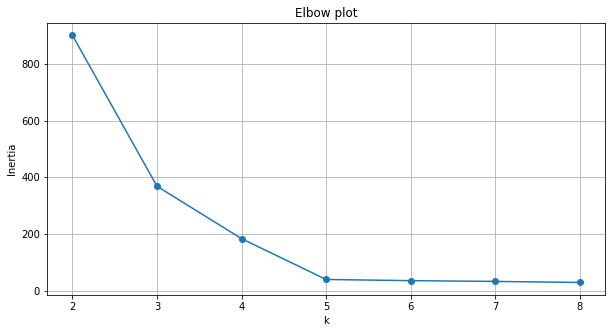

In [91]:
#2
plt.figure(figsize=[10, 5])
plt.plot(range(2,9), inertias, "o-")
plt.title('Elbow plot')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid()

In [92]:
#3
x, y = make_moons(1000, noise=.05, random_state=0)

In [93]:
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

In [94]:
k_means = KMeans(n_clusters=2)

In [95]:
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [96]:
y_km = k_means.labels_

In [97]:
centers = k_means.cluster_centers_

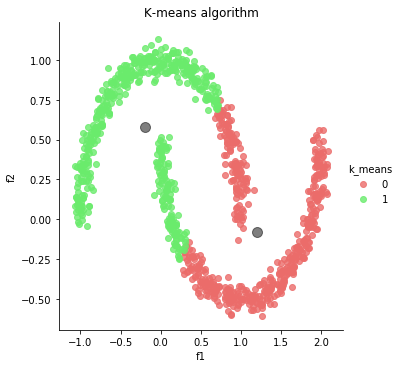

In [99]:
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='K-means algorithm')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()